In [2]:
# 전처리 : 클렌징, 텍스트 토큰화, 불용어 제거
# 최다단어, 워드클라우드, 긍부정, 사이즈 관련 단어, 

In [3]:
##### 형태소 분석 ######

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import re
from collections import Counter


import konlpy.tag


import warnings
warnings.simplefilter("ignore")

In [5]:
path = r"C:\Users\NT550009\Desktop\11st\sample_df( '3569992365', '3556338225' ).xlsx"
df = pd.read_excel(path)

In [6]:
df.head()

,Unnamed: 0,ID,Date,Grade,Text,Option,Size,ProductNum
0,0,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",비공개,3569992365
1,1,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",비공개,3569992365
2,2,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",비공개,3569992365
3,3,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",비공개,3569992365
4,4,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",비공개,3569992365


In [7]:
df.tail()

,Unnamed: 0,ID,Date,Grade,Text,Option,Size,ProductNum
795,795,grac*******,2021.11.24,5,0,0,0,3556338225
796,796,gree*************************,2021.11.22,3,옷 품질이 좀 그래요,0,0,3556338225
797,797,sunb*******,2021.11.19,5,재질도 톡톡하니 너무 좋네요~,0,0,3556338225
798,798,cjh2**,2021.11.18,3,넘 커요,0,0,3556338225
799,799,mjhm**,2021.11.17,4,0,0,0,3556338225


<Axes: title={'center': 'ratings'}>

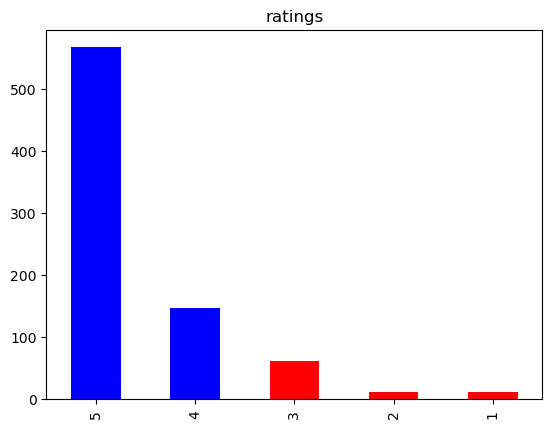

In [8]:
df["Grade"].value_counts().plot(kind="bar",
                              title = 'ratings',
                              color = ['b','b','r','r','r']
                                )

In [9]:
df["Grade"].mean()

4.55625

In [10]:
# 결측치 확인
df.isnull().sum()

Unnamed: 0    0
ID            0
Date          0
Grade         0
Text          0
Option        0
Size          0
ProductNum    0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  800 non-null    int64 
 1   ID          800 non-null    object
 2   Date        800 non-null    object
 3   Grade       800 non-null    int64 
 4   Text        800 non-null    object
 5   Option      800 non-null    object
 6   Size        800 non-null    object
 7   ProductNum  800 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 50.1+ KB


In [12]:
import re

def apply_regular_expression(Text):
    kor = re.compile('[^ ㄱ-ㅣ 가-힣]')  # 한글 추출 규칙: 띄어 쓰기(1 개)를 포함한 한글
    result = kor.sub("",Text) # 위에 설정한 kor 규칙을 text에 적용시킴 
    return result

In [13]:
text = df["Text"][0]
print(text)

쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어깨선 재봉선이 씹힌것도 있어요. 보통 100입는데 M 잘 맞네요.


In [14]:
print(apply_regular_expression(df["Text"][0]))

쿠폰써서 만원정도에 벌이면 정말 싸요 싼만큼 마감이 안좋은 부분도 있네요 어깨선 재봉선이 씹힌것도 있어요 보통 입는데  잘 맞네요


In [15]:
# 정규식 처리하면 숫자 제거..

In [16]:
# konlpy 설치 완료! 
# 형태소 분석

In [17]:
import konlpy

from konlpy.tag import Kkma
from konlpy.utils import pprint

In [18]:
from konlpy.tag import Okt

In [19]:
okt = Okt()

In [20]:
print('JAVA_HOME' in os.environ)

True


In [21]:
import konlpy
from konlpy.tag import Okt
okt = Okt()

In [22]:
# 명사, 부사, 동사 

In [23]:
df.iloc[0,4]

'쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어깨선 재봉선이 씹힌것도 있어요. 보통 100입는데 M 잘 맞네요.'

In [24]:
# 샘플 텍스트 정규화 okt.normalize(text)
text = df.iloc[0,4]
print(okt.normalize(text))

쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어깨선 재봉선이 씹힌것도 있어요. 보통 100입는데 M 잘 맞네요.


In [25]:
# 형태소 분석 okt.pos(text)

print(okt.pos(text))

[('쿠폰', 'Noun'), ('써서', 'Verb'), ('2만원', 'Number'), ('정도에', 'Foreign'), ('6', 'Number'), ('벌이', 'Noun'), ('면', 'Josa'), ('정말', 'Noun'), ('싸요', 'Verb'), ('.', 'Punctuation'), ('싼만큼', 'Verb'), ('마감', 'Noun'), ('이', 'Josa'), ('안좋은', 'Adjective'), ('부분', 'Noun'), ('도', 'Josa'), ('있네요', 'Adjective'), ('.', 'Punctuation'), ('어깨', 'Noun'), ('선', 'Noun'), ('재봉', 'Noun'), ('선', 'Noun'), ('이', 'Josa'), ('씹힌것도', 'Verb'), ('있어요', 'Adjective'), ('.', 'Punctuation'), ('보통', 'Noun'), ('100', 'Number'), ('입는데', 'Verb'), ('M', 'Alpha'), ('잘', 'Verb'), ('맞네요', 'Verb'), ('.', 'Punctuation')]


In [26]:
# 형태소 명사 추출 okt.nouns(text)
print(okt.nouns(text))

['쿠폰', '벌이', '정말', '마감', '부분', '어깨', '선', '재봉', '선', '보통']


In [27]:
def extract_verbs(text):
    pos = okt.pos(text)
    verbs = [word for word, tag in pos if tag in ['Verb']]
    return verbs
extract_verbs(text)

['써서', '싸요', '싼만큼', '씹힌것도', '입는데', '잘', '맞네요']

In [28]:
def extract_adj(text):
    pos = okt.pos(text)
    adjs = [word for word, tag in pos if tag in ['Adjective']]
    return adjs
extract_adj(text)

['안좋은', '있네요', '있어요']

In [29]:
# 

In [30]:
# https://moojuksublime.tistory.com/14

# 경고 뜨지 않게 설정
import warnings
warnings.filterwarnings('ignore')

# 형태소 벡터를 생성하기 위한 라이브러리
from sklearn.feature_extraction.text import CountVectorizer
# 형태소 벡터를 학습 벡터로 변환한다.
from sklearn.feature_extraction.text import TfidfTransformer

# 워드 클라우드를 위한 라이브러리
from collections import Counter
# import pytagcloud
from IPython.display import Image

# 저장
import pickle

In [31]:

#  형태소 추출
def get_pos(x):
    tagger = Okt()
    pos = tagger.pos(x)
    
    result = []
    
    for i in pos:
        result.append(f'{i[0]}/{i[1]}')
        
    return result

In [32]:
get_pos(text)

['쿠폰/Noun',
 '써서/Verb',
 '2만원/Number',
 '정도에/Foreign',
 '6/Number',
 '벌이/Noun',
 '면/Josa',
 '정말/Noun',
 '싸요/Verb',
 './Punctuation',
 '싼만큼/Verb',
 '마감/Noun',
 '이/Josa',
 '안좋은/Adjective',
 '부분/Noun',
 '도/Josa',
 '있네요/Adjective',
 './Punctuation',
 '어깨/Noun',
 '선/Noun',
 '재봉/Noun',
 '선/Noun',
 '이/Josa',
 '씹힌것도/Verb',
 '있어요/Adjective',
 './Punctuation',
 '보통/Noun',
 '100/Number',
 '입는데/Verb',
 'M/Alpha',
 '잘/Verb',
 '맞네요/Verb',
 './Punctuation']

In [33]:
# 형태소 벡터 
index_vectorizer = CountVectorizer(tokenizer = lambda x : get_pos(x))
X = index_vectorizer.fit_transform(df["Text"].astype(str).tolist())

X

<800x2181 sparse matrix of type '<class 'numpy.int64'>'
	with 8016 stored elements in Compressed Sparse Row format>

In [34]:
df["Text_Position"] = 0
df.head()

,Unnamed: 0,ID,Date,Grade,Text,Option,Size,ProductNum,Text_Position
0,0,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",비공개,3569992365,0
1,1,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",비공개,3569992365,0
2,2,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",비공개,3569992365,0
3,3,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",비공개,3569992365,0
4,4,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",비공개,3569992365,0


In [35]:
df.tail()

,Unnamed: 0,ID,Date,Grade,Text,Option,Size,ProductNum,Text_Position
795,795,grac*******,2021.11.24,5,0,0,0,3556338225,0
796,796,gree*************************,2021.11.22,3,옷 품질이 좀 그래요,0,0,3556338225,0
797,797,sunb*******,2021.11.19,5,재질도 톡톡하니 너무 좋네요~,0,0,3556338225,0
798,798,cjh2**,2021.11.18,3,넘 커요,0,0,3556338225,0
799,799,mjhm**,2021.11.17,4,0,0,0,3556338225,0


In [36]:
df["Text_Position"] = df["Text_Position"].astype('str')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     800 non-null    int64 
 1   ID             800 non-null    object
 2   Date           800 non-null    object
 3   Grade          800 non-null    int64 
 4   Text           800 non-null    object
 5   Option         800 non-null    object
 6   Size           800 non-null    object
 7   ProductNum     800 non-null    int64 
 8   Text_Position  800 non-null    object
dtypes: int64(3), object(6)
memory usage: 56.4+ KB


In [38]:
okt.pos(df.iloc[0,4])

[('쿠폰', 'Noun'),
 ('써서', 'Verb'),
 ('2만원', 'Number'),
 ('정도에', 'Foreign'),
 ('6', 'Number'),
 ('벌이', 'Noun'),
 ('면', 'Josa'),
 ('정말', 'Noun'),
 ('싸요', 'Verb'),
 ('.', 'Punctuation'),
 ('싼만큼', 'Verb'),
 ('마감', 'Noun'),
 ('이', 'Josa'),
 ('안좋은', 'Adjective'),
 ('부분', 'Noun'),
 ('도', 'Josa'),
 ('있네요', 'Adjective'),
 ('.', 'Punctuation'),
 ('어깨', 'Noun'),
 ('선', 'Noun'),
 ('재봉', 'Noun'),
 ('선', 'Noun'),
 ('이', 'Josa'),
 ('씹힌것도', 'Verb'),
 ('있어요', 'Adjective'),
 ('.', 'Punctuation'),
 ('보통', 'Noun'),
 ('100', 'Number'),
 ('입는데', 'Verb'),
 ('M', 'Alpha'),
 ('잘', 'Verb'),
 ('맞네요', 'Verb'),
 ('.', 'Punctuation')]

In [39]:
okt.pos(df.iloc[1,4])

[('옷', 'Noun'),
 ('에', 'Josa'),
 ('비침도', 'Verb'),
 ('크게', 'Noun'),
 ('없고', 'Adjective'),
 ('사이즈', 'Noun'),
 ('도', 'Josa'),
 ('넉넉해서', 'Adjective'),
 ('좋습니다', 'Adjective'),
 ('.', 'Punctuation'),
 ('이번', 'Noun'),
 ('여름', 'Noun'),
 ('까지', 'Josa'),
 ('무난', 'Noun'),
 ('하게', 'Verb'),
 ('잘', 'Verb'),
 ('입', 'Noun'),
 ('을', 'Josa'),
 ('것', 'Noun'),
 ('같아요', 'Adjective'),
 ('.', 'Punctuation')]

In [40]:
for i in range(0, df.shape[0]): 
    df.at[i, "Text_Position"] = okt.pos(str(df.iloc[i, 4]))

df.head()

,Unnamed: 0,ID,Date,Grade,Text,Option,Size,ProductNum,Text_Position
0,0,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",비공개,3569992365,"[(쿠폰, Noun), (써서, Verb), (2만원, Number), (정도에, ..."
1,1,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",비공개,3569992365,"[(옷, Noun), (에, Josa), (비침도, Verb), (크게, Noun)..."
2,2,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",비공개,3569992365,"[(잘, Verb), (알려진, Verb), (브랜드, Noun), (입니다, Ad..."
3,3,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",비공개,3569992365,"[(얇아서, Adjective), (비침이, Verb), (있으며, Adjectiv..."
4,4,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",비공개,3569992365,"[(저렴하게, Adjective), (막, Noun), (입기, Verb), (좋네..."


In [41]:
# https://liveyourit.tistory.com/57


In [42]:
# 컬럼값을 합쳐서 최빈값 
combined_list = df['Text_Position'].sum()
print(combined_list)


[('쿠폰', 'Noun'), ('써서', 'Verb'), ('2만원', 'Number'), ('정도에', 'Foreign'), ('6', 'Number'), ('벌이', 'Noun'), ('면', 'Josa'), ('정말', 'Noun'), ('싸요', 'Verb'), ('.', 'Punctuation'), ('싼만큼', 'Verb'), ('마감', 'Noun'), ('이', 'Josa'), ('안좋은', 'Adjective'), ('부분', 'Noun'), ('도', 'Josa'), ('있네요', 'Adjective'), ('.', 'Punctuation'), ('어깨', 'Noun'), ('선', 'Noun'), ('재봉', 'Noun'), ('선', 'Noun'), ('이', 'Josa'), ('씹힌것도', 'Verb'), ('있어요', 'Adjective'), ('.', 'Punctuation'), ('보통', 'Noun'), ('100', 'Number'), ('입는데', 'Verb'), ('M', 'Alpha'), ('잘', 'Verb'), ('맞네요', 'Verb'), ('.', 'Punctuation'), ('옷', 'Noun'), ('에', 'Josa'), ('비침도', 'Verb'), ('크게', 'Noun'), ('없고', 'Adjective'), ('사이즈', 'Noun'), ('도', 'Josa'), ('넉넉해서', 'Adjective'), ('좋습니다', 'Adjective'), ('.', 'Punctuation'), ('이번', 'Noun'), ('여름', 'Noun'), ('까지', 'Josa'), ('무난', 'Noun'), ('하게', 'Verb'), ('잘', 'Verb'), ('입', 'Noun'), ('을', 'Josa'), ('것', 'Noun'), ('같아요', 'Adjective'), ('.', 'Punctuation'), ('잘', 'Verb'), ('알려진', 'Verb'), ('브랜드', 'Noun'), ('입

In [43]:
from collections import defaultdict

# 리스트에서 각 품사별로 가장 많이 등장한 단어와 등장 횟수를 반환하는 함수
def find_most_common_words(lst):
    # 각 품사별로 등장한 단어와 등장 횟수를 담을 딕셔너리
    noun_dict = defaultdict(int)
    verb_dict = defaultdict(int)
    adjective_dict = defaultdict(int)
    adverb_dict = defaultdict(int)
    etc_dict = defaultdict(int)

    # 리스트에서 각 단어와 품사를 추출하고, 딕셔너리에서 해당하는 항목의 값을 1 증가시킴
    for word, tag in lst:
        if tag.startswith('N'):  # 명사
            noun_dict[(tag, word)] += 1
        elif tag.startswith('V'):  # 동사
            verb_dict[(tag, word)] += 1
        elif tag.startswith('J'):  # 형용사
            adjective_dict[(tag, word)] += 1
        elif tag.startswith('A'):  # 부사
            adverb_dict[(tag, word)] += 1
        else:  # 그 외의 품사
            etc_dict[(tag, word)] += 1

    # 딕셔너리에서 각 품사별로 등장 횟수가 가장 많은 항목 추출
    noun_most_common = max(noun_dict.items(), key=lambda x: x[1])
    # verb_most_common = max(verb_dict.items(), key=lambda x: x[1])
    # adjective_most_common = max(adjective_dict.items(), key=lambda x: x[1])
    # adverb_most_common = max(adverb_dict.items(), key=lambda x: x[1])
    # etc_most_common = max(etc_dict.items(), key=lambda x: x[1])

    # 결과를 튜플로 묶어 반환
    return (noun_most_common[0][0], noun_most_common[0][1], noun_most_common[1][1])

In [44]:
# find_most_common_words(combined_list)

In [45]:
from collections import Counter

def get_most_common_words_by_pos(combined_list):
    # 품사별로 등장한 단어를 저장할 딕셔너리 초기화
    pos_count = {pos: (None, 0) for _, pos in combined_list}
    
    # 품사별로 등장한 단어와 횟수를 세서 딕셔너리에 저장
    for word, pos in combined_list:
        count = pos_count[pos][1] + 1
        pos_count[pos] = (word, count)

    # 각 품사별로 가장 많이 등장한 단어와 횟수를 반환
    result = []
    for pos, (word, count) in pos_count.items():
        if word is not None:
            result.append((pos, word, count))
    return result

In [46]:
get_most_common_words_by_pos(combined_list)

[('Noun', '재질', 3183),
 ('Verb', '커요', 1336),
 ('Number', '0', 369),
 ('Foreign', '？？', 33),
 ('Josa', '도', 1241),
 ('Punctuation', '~', 606),
 ('Adjective', '좋네요', 1206),
 ('Alpha', 'Itch', 127),
 ('Determiner', '한', 76),
 ('Adverb', '너무', 157),
 ('Suffix', '네', 57),
 ('Eomi', '아요', 13),
 ('Conjunction', '그리고', 4),
 ('VerbPrefix', '짱', 38),
 ('KoreanParticle', 'ㅎㅎ', 58),
 ('Modifier', '구', 107),
 ('Exclamation', '플', 8)]

In [47]:
def most_common_nouns(combined_list):
    # 모든 명사 단어를 추출하여 개수를 셉니다.
    noun_count = {}
    for word, pos in combined_list:
        if pos == 'Noun':
            if word in noun_count:
                noun_count[word] += 1
            else:
                noun_count[word] = 1
    
    # 가장 많이 등장한 상위 10개의 명사 단어를 선택합니다.
    top_nouns = sorted(noun_count.items(), key=lambda x: x[1], reverse=True)[:10]
    
    # (품사, 단어, 등장 횟수) 형태로 변환하여 반환합니다.
    return [('Noun', noun, count) for noun, count in top_nouns]

In [48]:
most_common_nouns(combined_list)

[('Noun', '사이즈', 205),
 ('Noun', '가격', 88),
 ('Noun', '구매', 67),
 ('Noun', '배송', 66),
 ('Noun', '옷', 55),
 ('Noun', '생각', 48),
 ('Noun', '가성', 43),
 ('Noun', '비', 41),
 ('Noun', '주문', 37),
 ('Noun', '제품', 35)]

In [49]:
def most_common_verbs(combined_list):
    # 모든 명사 단어를 추출하여 개수를 셉니다.
    verb_count = {}
    for word, pos in combined_list:
        if pos == 'Verb':
            if word in verb_count:
                verb_count[word] += 1
            else:
                verb_count[word] = 1
    
    # 가장 많이 등장한 상위 10개의 동사 단어를 선택합니다.
    top_verbs = sorted(verb_count.items(), key=lambda x: x[1], reverse=True)[:10]
    
    # (품사, 단어, 등장 횟수) 형태로 변환하여 반환합니다.
    return [('Verb', verb, count) for verb, count in top_verbs]

In [50]:
most_common_verbs(combined_list)

[('Verb', '잘', 67),
 ('Verb', '입기', 51),
 ('Verb', '합니다', 31),
 ('Verb', '해서', 24),
 ('Verb', '크네요', 23),
 ('Verb', '했는데', 21),
 ('Verb', '감사합니다', 20),
 ('Verb', '했습니다', 17),
 ('Verb', '입는', 16),
 ('Verb', '입고', 14)]

In [51]:
def most_common_nouns(combined_list):
    # 모든 명사 단어를 추출하여 개수를 셉니다.
    noun_count = {}
    for word, pos in combined_list:
        if pos == 'Noun':
            if word in noun_count:
                noun_count[word] += 1
            else:
                noun_count[word] = 1
    
    # 가장 많이 등장한 상위 10개의 명사 단어를 선택합니다.
    top_nouns = sorted(noun_count.items(), key=lambda x: x[1], reverse=True)[:10]
    
    # (품사, 단어, 등장 횟수) 형태로 변환하여 반환합니다.
    return [('Noun', noun, count) for noun, count in top_nouns]

In [52]:
 most_common_nouns(combined_list)

[('Noun', '사이즈', 205),
 ('Noun', '가격', 88),
 ('Noun', '구매', 67),
 ('Noun', '배송', 66),
 ('Noun', '옷', 55),
 ('Noun', '생각', 48),
 ('Noun', '가성', 43),
 ('Noun', '비', 41),
 ('Noun', '주문', 37),
 ('Noun', '제품', 35)]

In [63]:
def most_common_adjs(combined_list):
    # 모든 명사 단어를 추출하여 개수를 셉니다.
    adj_count = {}
    for word, pos in combined_list:
        if pos == 'Adjective':
            if word in adj_count:
                adj_count[word] += 1
            else:
                adj_count[word] = 1
    
    # 가장 많이 등장한 상위 10개의 명사 단어를 선택합니다.
    top_adjs = sorted(adj_count.items(), key=lambda x: x[1], reverse=True)[:30]
    
    # (품사, 단어, 등장 횟수) 형태로 변환하여 반환합니다.
    return [('adj', adj, count) for adj, count in top_adjs]

In [64]:
most_common_adjs(combined_list)

[('adj', '좋아요', 118),
 ('adj', '입니다', 60),
 ('adj', '좋고', 45),
 ('adj', '좋습니다', 43),
 ('adj', '좋네요', 35),
 ('adj', '만족합니다', 31),
 ('adj', '좋은', 26),
 ('adj', '같아요', 25),
 ('adj', '편하게', 21),
 ('adj', '저렴하게', 18),
 ('adj', '괜찮아요', 16),
 ('adj', '빠르고', 15),
 ('adj', '저렴한', 14),
 ('adj', '작게', 13),
 ('adj', '같습니다', 12),
 ('adj', '같은', 11),
 ('adj', '얇은', 10),
 ('adj', '같네요', 10),
 ('adj', '넉넉하고', 10),
 ('adj', '얇고', 9),
 ('adj', '있어요', 8),
 ('adj', '나쁘지', 8),
 ('adj', '아니라', 7),
 ('adj', '있는', 7),
 ('adj', '저렴하고', 7),
 ('adj', '있어서', 7),
 ('adj', '얇아서', 6),
 ('adj', '있지만', 6),
 ('adj', '있습니다', 6),
 ('adj', '넉넉한', 6)]

In [55]:
df.head()

,Unnamed: 0,ID,Date,Grade,Text,Option,Size,ProductNum,Text_Position
0,0,날까,2023.04.08,4,쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어...,"White 6-pack, 6, Medium",비공개,3569992365,"[(쿠폰, Noun), (써서, Verb), (2만원, Number), (정도에, ..."
1,1,newr*****,2023.03.27,5,옷에 비침도 크게 없고 사이즈도 넉넉해서 좋습니다. 이번 여름까지 무난하게 잘 입을...,"XX-Large, 6, White 6-pack",비공개,3569992365,"[(옷, Noun), (에, Josa), (비침도, Verb), (크게, Noun)..."
2,2,soch*****,2023.03.31,4,잘 알려진 브랜드입니다.면이 얇고 빨면 줄기도 합니다.올 여름 편하게 입으려고 구매...,"X-Large, 6, Charcoal Heather 6-pack",비공개,3569992365,"[(잘, Verb), (알려진, Verb), (브랜드, Noun), (입니다, Ad..."
3,3,2045***************,2023.03.02,5,얇아서 비침이 있으며 꽤 부드러운 재질입니다.이너로 입기 괜찮을듯,"6, Large, White 6-pack",비공개,3569992365,"[(얇아서, Adjective), (비침이, Verb), (있으며, Adjectiv..."
4,4,하이하이저요,2023.03.21,3,저렴하게 막 입기 좋네요생각보다 정사이즈인거 같아요 라지입는데 미듐샀더니가슴둘레가 ...,"Medium, 6, Navy 6-pack",비공개,3569992365,"[(저렴하게, Adjective), (막, Noun), (입기, Verb), (좋네..."


In [56]:
df.iloc[0,4]

'쿠폰써서 2만원정도에 6벌이면 정말 싸요. 싼만큼 마감이 안좋은 부분도 있네요. 어깨선 재봉선이 씹힌것도 있어요. 보통 100입는데 M 잘 맞네요.'

In [57]:
len(df.iloc[0,4])

82

In [58]:
# len(df.iloc[0,4]) >= 10 그리고 grade = 5